In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [12]:
# Download stock data using yfinance
ticker = 'RELIANCE.NS'  # Change this to your desired stock
start_date = '2015-01-01'
end_date = '2023-01-01'
data = yf.download(ticker, start=start_date, end=end_date)

# Use the 'Close' column for prediction
data = data[['Close']]

# Handle missing values
data.dropna(inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences (input-output pairs)
def create_sequences(data, sequence_length):
    x, y = [], []
    for i in range(sequence_length, len(data)):
        x.append(data[i-sequence_length:i, 0])  # Past `sequence_length` days
        y.append(data[i, 0])  # Target value (next day's price)
    return np.array(x), np.array(y)

# Define sequence length
sequence_length = 120  # 60 days of data to predict the next day's price

# Create sequences
x, y = create_sequences(scaled_data, sequence_length)

[*********************100%***********************]  1 of 1 completed


In [13]:
# Split data into training and testing sets (80% training, 20% testing)
split_index = int(0.8 * len(x))
x_train, x_test = x[:split_index], x[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape input data to 3D (samples, time_steps, features) for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [14]:
# Build the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)  # Output layer
])


C:\Users\Shree\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=20, verbose=1)

# Predict on test data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Reverse scaling for interpretation

# Reverse scale the actual values for comparison
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - loss: 0.0214
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.0021
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.0016
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0013
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.0014
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.0011
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0011
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0012
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 0.0011
Epoch 10/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0010
Epoch 11/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 9.8711e-04
Epoch 12/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 9.6052e-04
Epoch 13/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 8.9461e-04
Epoch 14/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 9.4536e-04
Epoch 15/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/

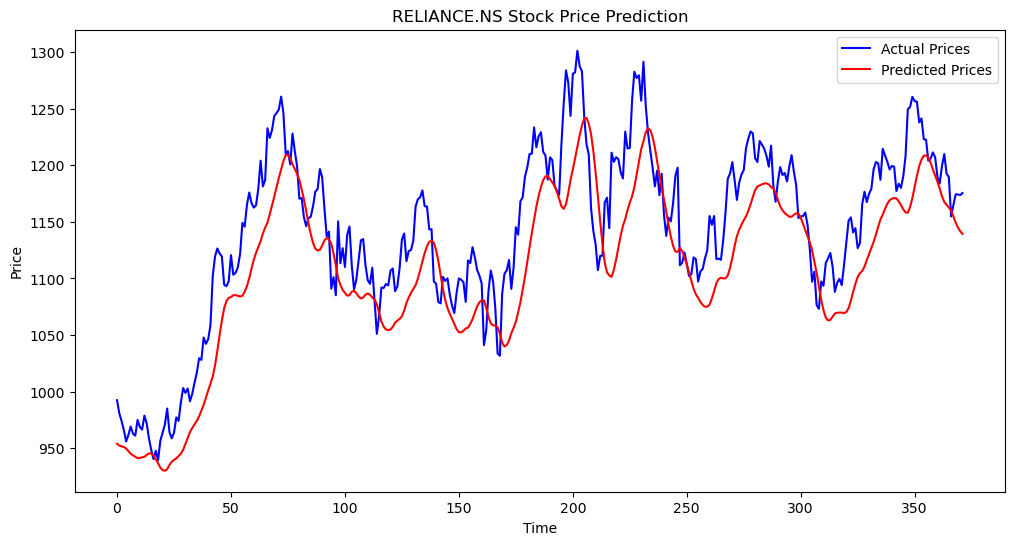

In [16]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [18]:
import os

# Specify the filename (replace with your actual file name if different)
ticker_file = 'RELIANCE_stock_data.csv'  # Update the name if different

# Get the current working directory
current_directory = os.getcwd()

# Check if the file exists in the current directory
if os.path.exists(ticker_file):
    file_location = os.path.join(current_directory, ticker_file)
    print(f"File '{ticker_file}' is located at: {file_location}")
else:
    print(f"File '{ticker_file}' not found in the current directory.")


File 'RELIANCE_stock_data.csv' is located at: C:\Users\Shree\RELIANCE_stock_data.csv
